In [1]:
import numpy as np
from diffusion_map import diffusion_map
from sklearn import manifold, datasets
import matplotlib.pyplot as plt
import visualization
from sklearn.decomposition import PCA
import datafold.dynfold as dfold
import datafold.pcfold as pfold
from datafold.dynfold import LocalRegressionSelection
from datafold.utils.plot import plot_pairwise_eigenvector

# Task 2/4: Diffusion Maps

## Part One: Periodic Data Set

In [2]:
#create periodic dataset
N = 1000
k = np.arange(1,N + 1,1)
t_k = (2*np.pi*k) / (N + 1)
X_periodic = np.array([[np.cos(t), np.sin(t)] for t in t_k])

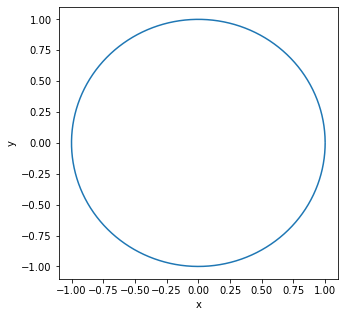

In [3]:
#plot periodic dataset
plot = visualization.plot_2d_dataset(X_periodic, scatter=False)
plot.savefig("figures/periodic_dataset.pdf")

In [31]:
#calculate diffusion map
L = 5
lambda_l_periodic, phi_l_periodic = diffusion_map(data_set=X_periodic,L=L)
print(f"Eigenvalues:\n{lambda_l_periodic}")

Eigenvalues:
[1.         0.87965296 0.87956515 0.59919324 0.59850672 0.31647998]


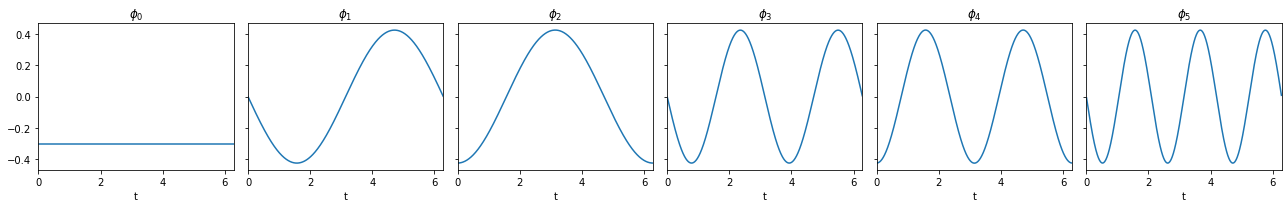

In [5]:
#plot eigenfunctions against t_k
figsize = 3
fig, ax = plt.subplots(1,L+1, figsize=((L+1)*figsize,figsize), sharey=True)

for j in range(L+1):
    ax[j].plot(t_k, phi_l_periodic[:,j])
    ax[j].set_xlabel('t')
    ax[j].set_xlim(0, 2*np.pi)
    ax[j].set_title(rf'$\phi_{j}$')
    plt.tight_layout()

plt.savefig("figures/periodic_eigenfunctions.pdf")

## Part Two: Swiss Role Data Set

### 5000 Data points

In [6]:
#create swiss role dataset
X_swiss_5000, color_5000 = datasets.make_swiss_roll(n_samples=5000, noise=0.0)

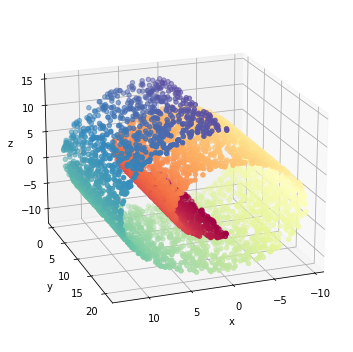

In [7]:
#plot swiss role dataset
plot = visualization.plot_3d_dataset(X_swiss_5000, color_5000, 'Spectral')
plot.savefig("figures/swiss_dataset_5000.pdf")

In [8]:
#calculate diffusion map
L = 10
_, phi_l_swiss_5000 = diffusion_map(data_set=X_swiss_5000,L=L)

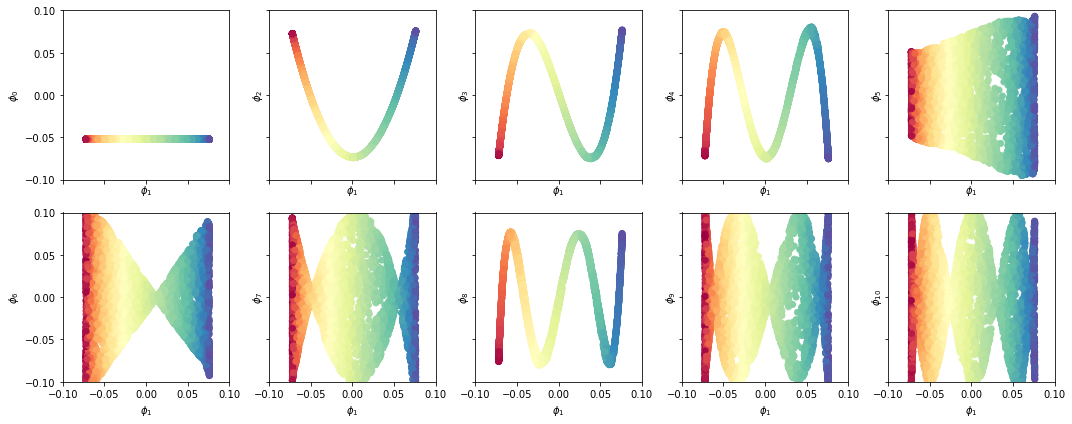

In [9]:
#plot pairwise eigenvectors
plot = visualization.plot_eigenvectors_pairwise(phi_l_swiss_5000, color_5000, L)
plot.savefig("figures/swiss_eigenfunctions_5000.pdf")

### 1000 Data points

In [10]:
#create swiss role dataset
X_swiss_1000, color_1000 = datasets.make_swiss_roll(n_samples=1000, noise=0.0)

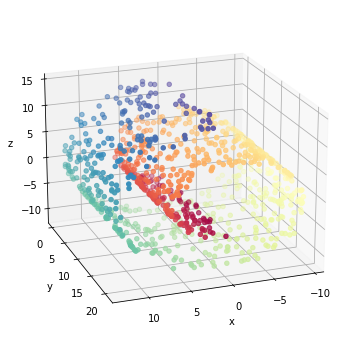

In [11]:
#plot swiss role dataset
plot = visualization.plot_3d_dataset(X_swiss_1000, color_1000, 'Spectral')
plot.savefig("figures/swiss_dataset_1000.pdf")

In [12]:
#calculate diffusion map
L = 10
_, phi_l_swiss_1000 = diffusion_map(data_set=X_swiss_1000,L=L)

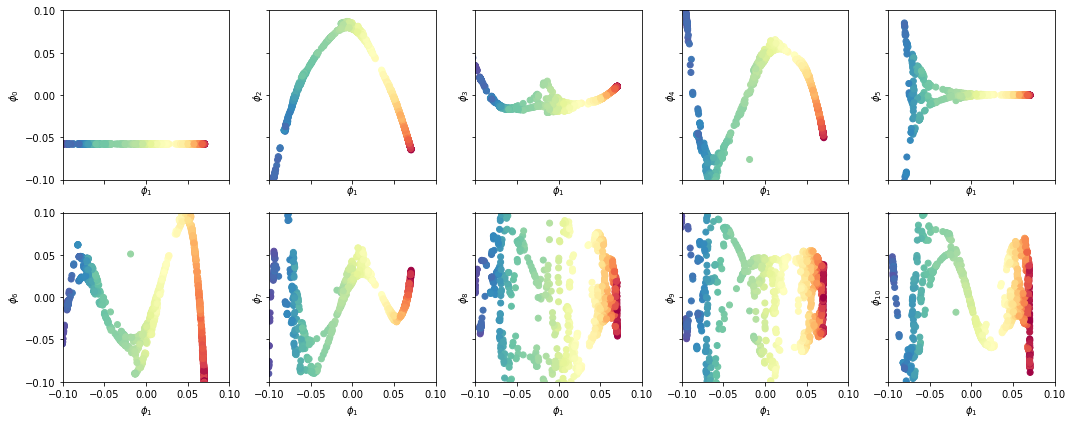

In [13]:
#plot pairwise eigenvectors
plot = visualization.plot_eigenvectors_pairwise(phi_l_swiss_1000, color_1000, L)
plot.savefig("figures/swiss_eigenfunctions_1000.pdf")

### Three Principle Components for 1000 Data points

Principle components:
[[ 0.6785743  -0.1239478   0.72399852]
 [ 0.60649103 -0.4614982  -0.64744733]
 [ 0.41437369  0.87843973 -0.23798759]]

Energy retained:
100.0%

Original shape:    (1000, 3)
Transformed shape: (1000, 3)


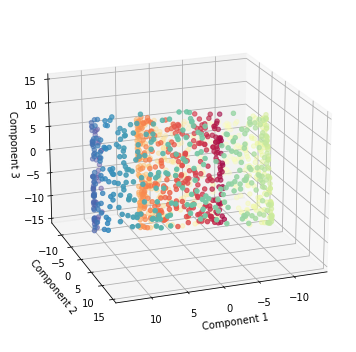

In [14]:
#use sklearn.decomposition to calculate the three principal components of the swiss-roll data set for 5000 points
pca_1000 = PCA(n_components=3)
pca_1000.fit(X_swiss_1000)
components_1000 = pca_1000.components_
variance_1000 = pca_1000.explained_variance_ratio_.cumsum()[-1] * 100
print(f"Principle components:\n{components_1000}\n")
print(f"Energy retained:\n{variance_1000:.4}%\n")

#use PCA as a dimensionality reduction transform
X_swiss_1000_pca = pca_1000.transform(X_swiss_1000)

#plot the 
plot = visualization.plot_3d_dataset(X_swiss_1000_pca, c=color_1000, cmap='Spectral')
plot.gca().set_xlabel("Component 1")
plot.gca().set_ylabel("Component 2")
plot.gca().set_zlabel("Component 3")
plot.savefig("figures/swiss_pca_1000")

#check the dimensions
print("Original shape:   ", X_swiss_1000.shape)
print("Transformed shape:", X_swiss_1000_pca.shape)

### Two Principle Components for 1000 Data Points

Principle components:
[[ 0.6785743  -0.1239478   0.72399852]
 [ 0.60649103 -0.4614982  -0.64744733]]

Energy retained:
73.02%

Original shape:    (1000, 3)
Transformed shape: (1000, 2)


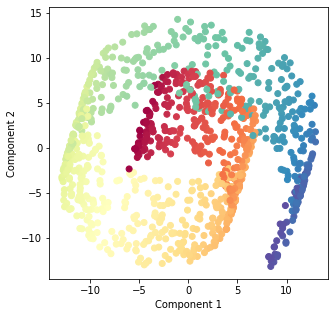

In [15]:
#use sklearn.decomposition to calculate the two principal components of the swiss-roll data set for 5000 points
pca_1000_2 = PCA(n_components=2)
pca_1000_2.fit(X_swiss_1000)
components_1000_2 = pca_1000_2.components_
variance_1000_2 = pca_1000_2.explained_variance_ratio_.cumsum()[-1] * 100
print(f"Principle components:\n{components_1000_2}\n")
print(f"Energy retained:\n{variance_1000_2:.4}%\n")

#use PCA as a dimensionality reduction transform
X_swiss_1000_2_pca = pca_1000_2.transform(X_swiss_1000)

#plot the 
plot = visualization.plot_2d_dataset(X_swiss_1000_2_pca, c=color_1000, cmap='Spectral')
plot.gca().set_xlabel("Component 1")
plot.gca().set_ylabel("Component 2")
plot.savefig("figures/swiss_pca_1000_2")

#check the dimensions
print("Original shape:   ", X_swiss_1000.shape)
print("Transformed shape:", X_swiss_1000_2_pca.shape)

## Part Three: Vadere Data

In [16]:
#load the vadere data set
X_vadere = np.loadtxt('data_DMAP_PCA_vadere.txt')

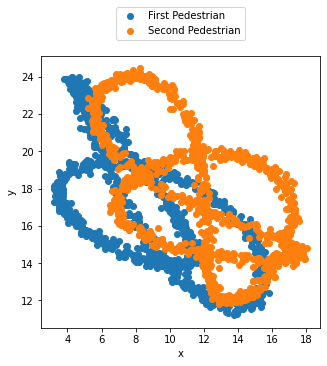

In [17]:
#plot the movement of the first two pedestrians in the x-y plane
X_vadere_first = X_vadere[:,0:2]
X_vadere_second= X_vadere[:,2:4]

_, ax = plt.subplots(figsize=(5, 5))
ax.scatter(X_vadere_first[:,0], X_vadere_first[:,1], label='First Pedestrian')
ax.scatter(X_vadere_second[:,0], X_vadere_second[:,1], label='Second Pedestrian')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend(loc='upper center', bbox_to_anchor=(0.0, 0.2, 1.0, 1.0))
plt.savefig("figures/vadere_movement_2d")

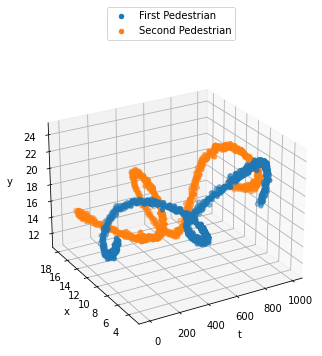

In [18]:
#plot the movement of the first two pedestrians in the x-y plane vs time
time = np.arange(0,1000,1)
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(time, X_vadere_first[:, 0], X_vadere_first[:, 1], label='First Pedestrian')
ax.scatter(time, X_vadere_second[:, 0], X_vadere_second[:, 1], label='Second Pedestrian')
ax.set_xlabel("t")
ax.set_ylabel("x")
ax.set_zlabel("y")
ax.view_init(elev=25, azim=-120)
ax.legend(loc='upper center', bbox_to_anchor=(0.0, 0.2, 1.0, 1.0))
plt.tight_layout()
plt.savefig("figures/vadere_movement_3d")

### PCA with two Components

Energy retained:
84.92%

Original shape:    (1000, 30)
Transformed shape: (1000, 2)


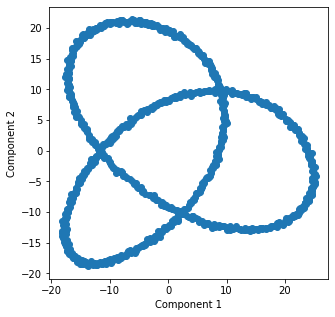

In [19]:
#use sklearn.decomposition to calculate the two principal components of the Vadere dataset
pca_vadere_2 = PCA(n_components=2)
pca_vadere_2.fit(X_vadere)
components_vadere_2 = pca_vadere_2.components_
variance_vadere_2 = pca_vadere_2.explained_variance_ratio_.cumsum()[-1] * 100
#print(f"Principle components:\n{components_vadere_2}\n")
print(f"Energy retained:\n{variance_vadere_2:.4}%\n")

#use PCA as a dimensionality reduction transform
X_vadere_pca_2 = pca_vadere_2.transform(X_vadere)

#plot the 
plot = visualization.plot_2d_dataset(X_vadere_pca_2)
plot.gca().set_xlabel("Component 1")
plot.gca().set_ylabel("Component 2")
plot.savefig("figures/vadere_pca_2")

#check the dimensions
print("Original shape:   ", X_vadere.shape)
print("Transformed shape:", X_vadere_pca_2.shape)


### PCA with three Components

Energy retained:
99.71%

Original shape:    (1000, 30)
Transformed shape: (1000, 3)


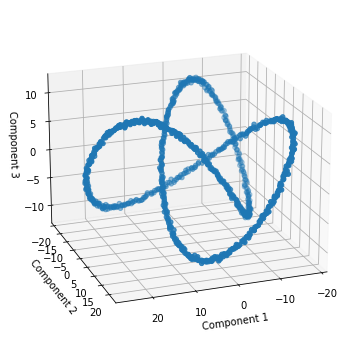

In [20]:
#use sklearn.decomposition to calculate the three principal components of the Vadere dataset
pca_vadere_3 = PCA(n_components=3)
pca_vadere_3.fit(X_vadere)
components_vadere_3 = pca_vadere_3.components_
variance_vadere_3 = pca_vadere_3.explained_variance_ratio_.cumsum()[-1] * 100
#print(f"Principle components:\n{components_vadere_3}\n")
print(f"Energy retained:\n{variance_vadere_3:.4}%\n")

#use PCA as a dimensionality reduction transform
X_vadere_pca_3 = pca_vadere_3.transform(X_vadere)

#plot the 
plot = visualization.plot_3d_dataset(X_vadere_pca_3)
plot.gca().set_xlabel("Component 1")
plot.gca().set_ylabel("Component 2")
plot.gca().set_zlabel("Component 3")
plot.savefig("figures/vadere_pca_3")

#check the dimensions
print("Original shape:   ", X_vadere.shape)
print("Transformed shape:", X_vadere_pca_3.shape)

### Diffusion Map Analysis

In [21]:
#calculate diffusion map
L = 10
_, phi_l_vadere = diffusion_map(data_set=X_vadere,L=L)

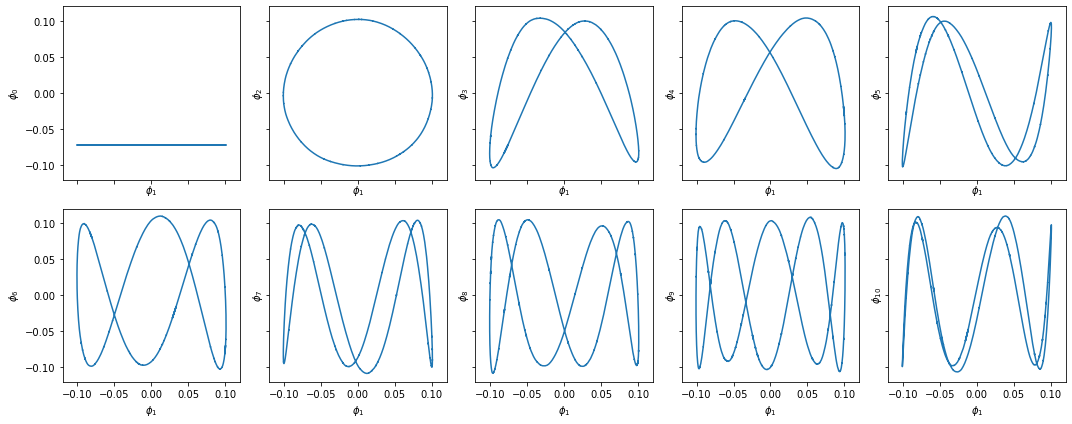

In [22]:
#plot pairwise eigenvectors
plot = visualization.plot_eigenvectors_pairwise(phi_l_vadere, color_1000, L, scatter=False, xlim=(-0.12, 0.12), ylim=(-0.12, 0.12))
plt.savefig("figures/vadere_eigenfunctions_1000.pdf")

## Bonus

In [23]:
X_pcm = pfold.PCManifold(X_swiss_5000)
X_pcm.optimize_parameters()

print(f"epsilon={X_pcm.kernel.epsilon}, cut-off={X_pcm.cut_off}")

epsilon=0.6480249178662458, cut-off=3.4550050833739836


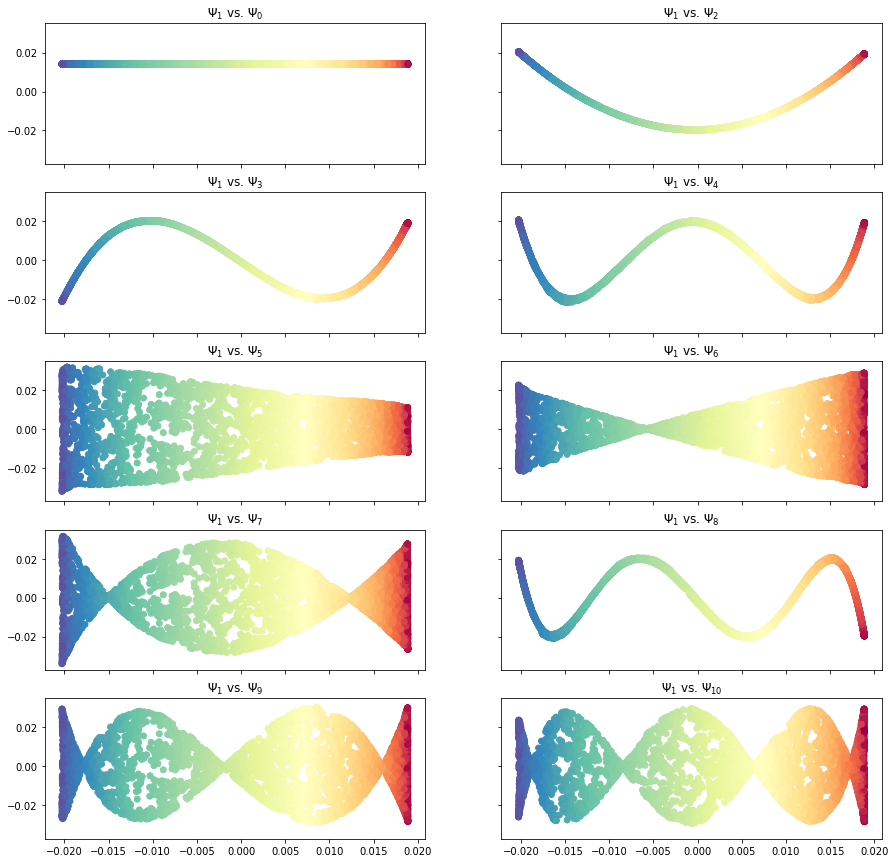

In [24]:
dmap = dfold.DiffusionMaps(
    kernel=pfold.GaussianKernel(epsilon=X_pcm.kernel.epsilon),
    n_eigenpairs=11,
    dist_kwargs=dict(cut_off=X_pcm.cut_off),
)
dmap = dmap.fit(X_pcm)
evecs, evals = dmap.eigenvectors_, dmap.eigenvalues_

#plot pairwise eigenvectors using datafold function from utils
plot_pairwise_eigenvector(
    eigenvectors=dmap.eigenvectors_,
    n=1,
    fig_params=dict(figsize=[15, 15]),
    scatter_params=dict(cmap=plt.cm.Spectral, c=color_5000),
)

In [25]:
#test automatic embedding selection -> indeed returns [1 5] as the best embedding eigenvector pair
selection = LocalRegressionSelection(
    intrinsic_dim=2, n_subsample=500, strategy="dim"
).fit(dmap.eigenvectors_)
print(f"Found parsimonious eigenvectors (indices): {selection.evec_indices_}")

Found parsimonious eigenvectors (indices): [1 5]


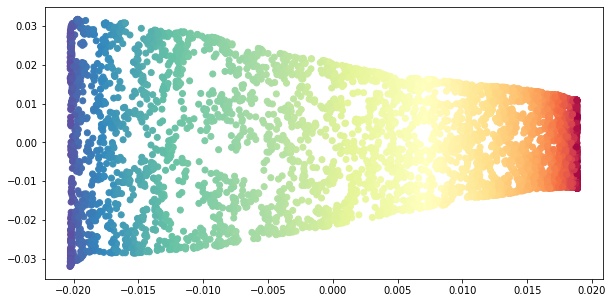

In [26]:
#plot the best unfolded swiss roll using found parsimonious eigenvector pair
target_mapping = selection.transform(dmap.eigenvectors_)

_, ax = plt.subplots(figsize=(10, 5))
ax.scatter(target_mapping[:, 0], target_mapping[:, 1], c=color_5000, cmap='Spectral')
plt.savefig("figures/swiss_datafold_unfolded")